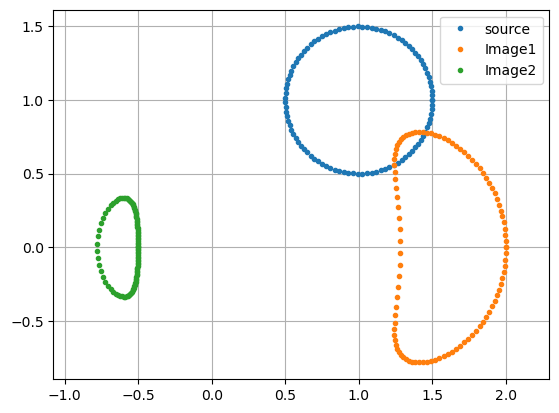

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sourceX0(r, theta, a):
    zX0 = a + r*np.cos(theta)
    return zX0
def sourceY0(r, theta, a):
    zY0 = a + r*np.sin(theta)
    return zY0
def funcX1(r, theta, a):
    zX1 = 0.5*(a+(r*np.cos(theta)))*(1+np.sqrt(1+(4/(a**2 + 2*a*r*np.cos(theta) + r**2))))
    return zX1
def funcY1(r, theta, a):
    zY1 = 0.5*(r*np.sin(theta))*(1+np.sqrt(1+(4/(a**2 + 2*a*r*np.cos(theta) + r**2)))) 
    return zY1
def funcX2(r, theta, a):
    zX2 = 0.5*(a+(r*np.cos(theta)))*(1-np.sqrt(1+(4/(a**2 + 2*a*r*np.cos(theta) + r**2))))
    return zX2
def funcY2(r, theta, a):
    zY2 = 0.5*(r*np.sin(theta))*(1-np.sqrt(1+(4/(a**2 + 2*a*r*np.cos(theta) + r**2))))
    return zY2

theta = np.linspace(0, 2*np.pi, 100)
r = 0.5
a = 1.0

X0 = sourceX0(r, theta, a)
Y0 = sourceY0(r, theta, a)
X1 = funcX1(r, theta, a)
Y1 = funcY1(r, theta, a)
X2 = funcX2(r, theta, a)
Y2 = funcY2(r, theta, a)
plt.plot(X0, Y0, '.', label='source')
plt.plot(X1, Y1, '.', label='Image1')
plt.plot(X2, Y2, '.', label='Image2')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


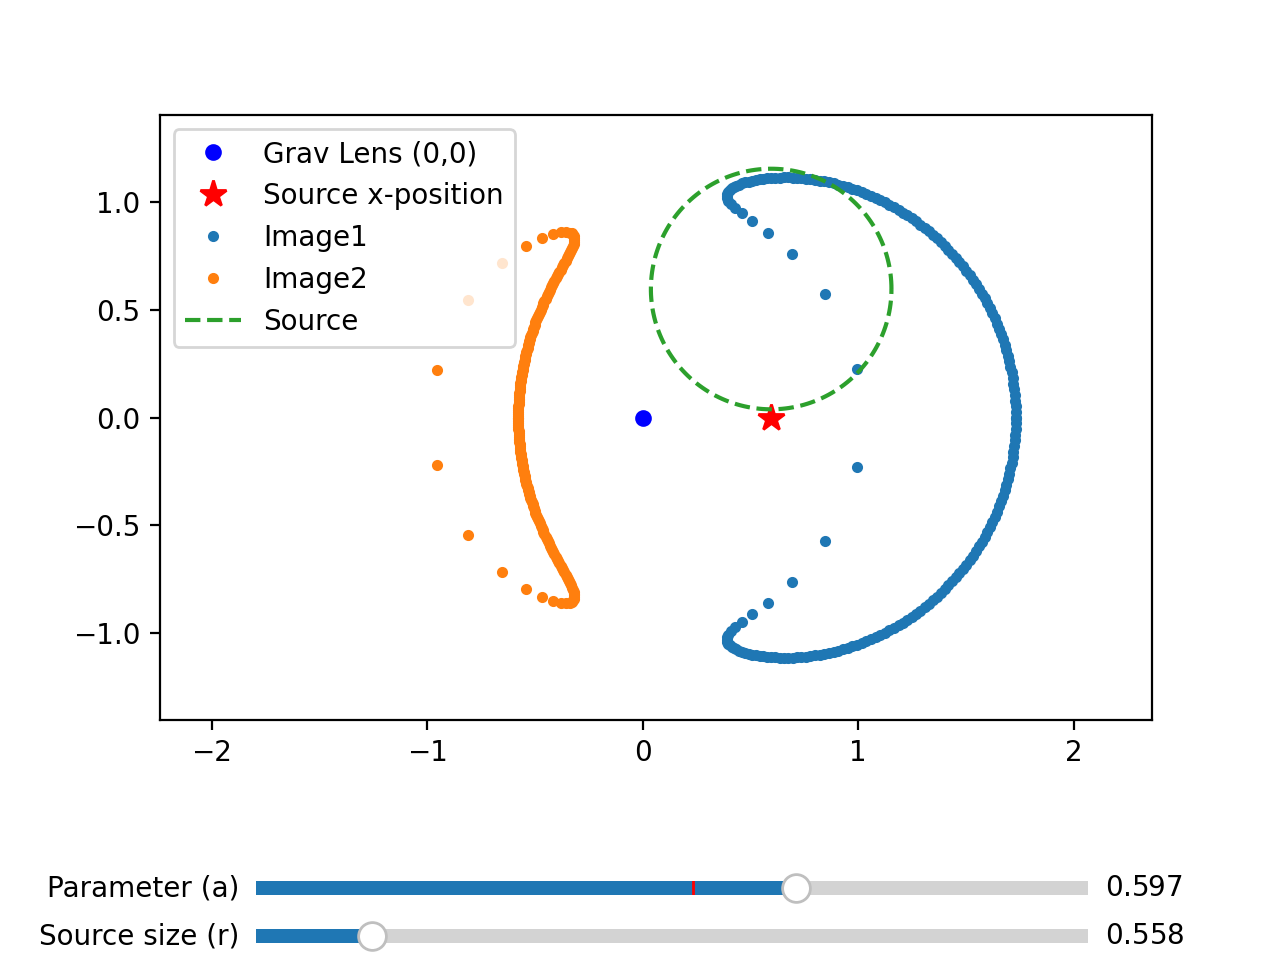

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def sourceX0(r, theta, a):
    zX0 = a + r*np.cos(theta)
    return zX0

def sourceY0(r, theta, a):
    zY0 = a + r*np.sin(theta)
    return zY0

def funcX1(r, theta, a):
    zX1 = 0.5*(a+(r*np.cos(theta)))*(1+np.sqrt(1+(4/(a**2 + 2*a*r*np.cos(theta) + r**2))))
    return zX1

def funcX2(r, theta, a):
    zX2 = 0.5*(a+(r*np.cos(theta)))*(1-np.sqrt(1+(4/(a**2 + 2*a*r*np.cos(theta) + r**2))))
    return zX2

def funcY1(r, theta, a):
    zY1 = 0.5*(r*np.sin(theta))*(1+np.sqrt(1+(4/(a**2 + 2*a*r*np.cos(theta) + r**2))))
    return zY1

def funcY2(r, theta, a):
    zY2 = 0.5*(r*np.sin(theta))*(1-np.sqrt(1+(4/(a**2 + 2*a*r*np.cos(theta) + r**2))))
    return zY2

# Initial values
initial_r = 0.5
initial_a = 0.1

theta = np.linspace(0, 2*np.pi, 200)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

X0 = sourceX0(initial_r, theta, initial_a)
Y0 = sourceY0(initial_r, theta, initial_a)
X1 = funcX1(initial_r, theta, initial_a)
Y1 = funcY1(initial_r, theta, initial_a)
X2 = funcX2(initial_r, theta, initial_a)
Y2 = funcY2(initial_r, theta, initial_a)

ax.plot(0, 0, 'o', color='blue', markersize=5, label='Grav Lens (0,0)')

circle, = ax.plot([], [], '*', color='red', markersize=10, label='Source x-position')

line1, = ax.plot(X1, Y1, '.', label='Image1')
line2, = ax.plot(X2, Y2, '.', label='Image2')
line3, = ax.plot(X0, Y0, '--', label='Source')

ax.axis('equal')
ax.legend()

# Adding sliders
axcolor = 'lightgoldenrodyellow'
ax_r = plt.axes([0.2, 0.01, 0.65, 0.03], facecolor=axcolor)
ax_a = plt.axes([0.2, 0.06, 0.65, 0.03], facecolor=axcolor)

s_r = Slider(ax_r, 'Source size (r)', 0.0, 4.0, valinit=initial_r)
s_a = Slider(ax_a, 'Parameter (a)', -2.0, 2.0, valinit=initial_a)

# Updating functions for slider
def update(val):
    r = s_r.val
    a = s_a.val
    X0 = sourceX0(r, theta, a)
    Y0 = sourceY0(r, theta, a)
    X1 = funcX1(r, theta, a)
    Y1 = funcY1(r, theta, a)
    X2 = funcX2(r, theta, a)
    Y2 = funcY2(r, theta, a)
    line1.set_xdata(X1)
    line1.set_ydata(Y1)
    line2.set_xdata(X2)
    line2.set_ydata(Y2)
    line3.set_xdata(X0)
    line3.set_ydata(Y0)
    
    # Updating circle center using parametric equations
    circle_center_x = a * np.cos(0)
    circle_center_y = a * np.sin(0)
    circle.set_xdata(circle_center_x)
    circle.set_ydata(circle_center_y)
    fig.canvas.draw_idle()

s_r.on_changed(update)
s_a.on_changed(update)
plt.show()